AI and Machine Learning Applications in Predicting Personalised Needs for Cancer Patients

In [2]:
#cells to run all libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import cross_val_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import classification_report

loading the datasets


In [3]:
file_path = "/Users/mizzy/Downloads/Honours project /Datasets /cancer patient lifestyle.xlsx"
data = pd.read_excel(file_path)


print(data.head())

  Patient Id  Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0         P1   33       1              2            4             5   
1        P10   17       1              3            1             5   
2       P100   35       1              4            5             6   
3      P1000   37       1              7            7             7   
4       P101   46       1              6            8             7   

   OccuPational Hazards  Genetic Risk  chronic Lung Disease  Balanced Diet  \
0                     4             3                     2              2   
1                     3             4                     2              2   
2                     5             5                     4              6   
3                     7             6                     7              7   
4                     7             7                     6              7   

   ...  Fatigue  Weight Loss  Shortness of Breath  Wheezing  \
0  ...        3            4             

In [4]:
# Check for missing values and duplicates
missing_values = data.isnull().sum()
duplicate_rows = data.duplicated().sum()

print("Missing Values:\n", missing_values)
print("\nDuplicate Rows:", duplicate_rows)


Missing Values:
 Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

Duplicate Rows: 0


In [5]:
numerical_stats = data.describe()
categorical_stats = data.describe(include=['O'])

print("\nNumerical Stats:\n", numerical_stats)
print("\nCategorical Stats:\n", categorical_stats)


Numerical Stats:
                Age       Gender  Air Pollution  Alcohol use  Dust Allergy  \
count  1000.000000  1000.000000      1000.0000  1000.000000   1000.000000   
mean     37.174000     1.402000         3.8400     4.563000      5.165000   
std      12.005493     0.490547         2.0304     2.620477      1.980833   
min      14.000000     1.000000         1.0000     1.000000      1.000000   
25%      27.750000     1.000000         2.0000     2.000000      4.000000   
50%      36.000000     1.000000         3.0000     5.000000      6.000000   
75%      45.000000     2.000000         6.0000     7.000000      7.000000   
max      73.000000     2.000000         8.0000     8.000000      8.000000   

       OccuPational Hazards  Genetic Risk  chronic Lung Disease  \
count           1000.000000   1000.000000           1000.000000   
mean               4.840000      4.580000              4.380000   
std                2.107805      2.126999              1.848518   
min                

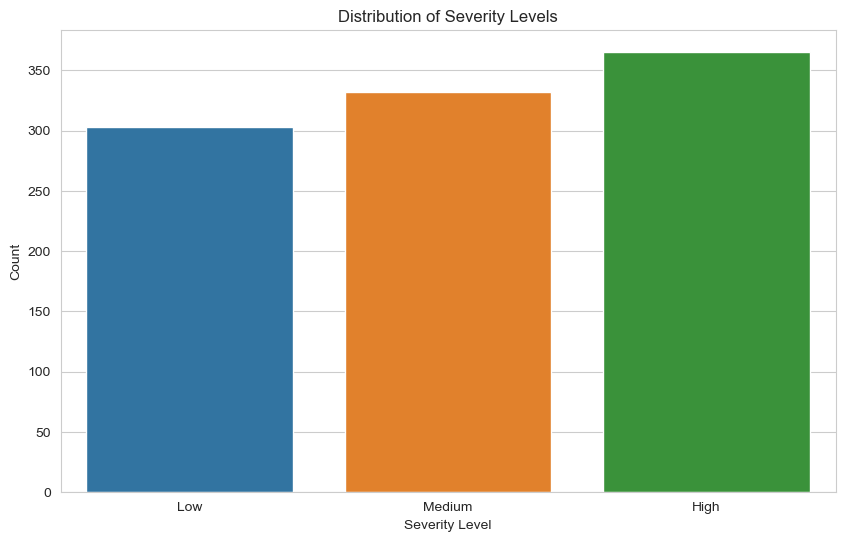

In [6]:
sns.set_style("whitegrid")

# Distribution of Severity Level
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Level', order=['Low', 'Medium', 'High'])
plt.title('Distribution of Severity Levels')
plt.xlabel('Severity Level')
plt.ylabel('Count')
plt.show()


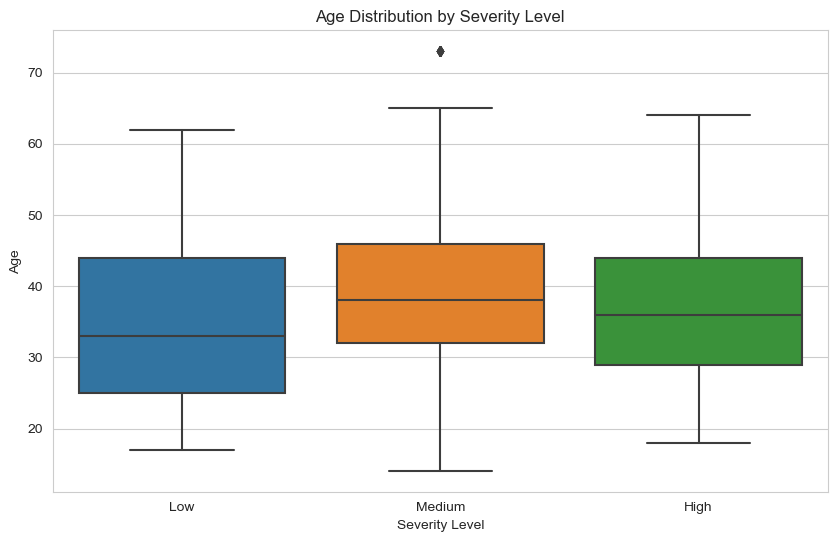

In [7]:

plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Level', y='Age', order=['Low', 'Medium', 'High'])
plt.title('Age Distribution by Severity Level')
plt.xlabel('Severity Level')
plt.ylabel('Age')
plt.show()


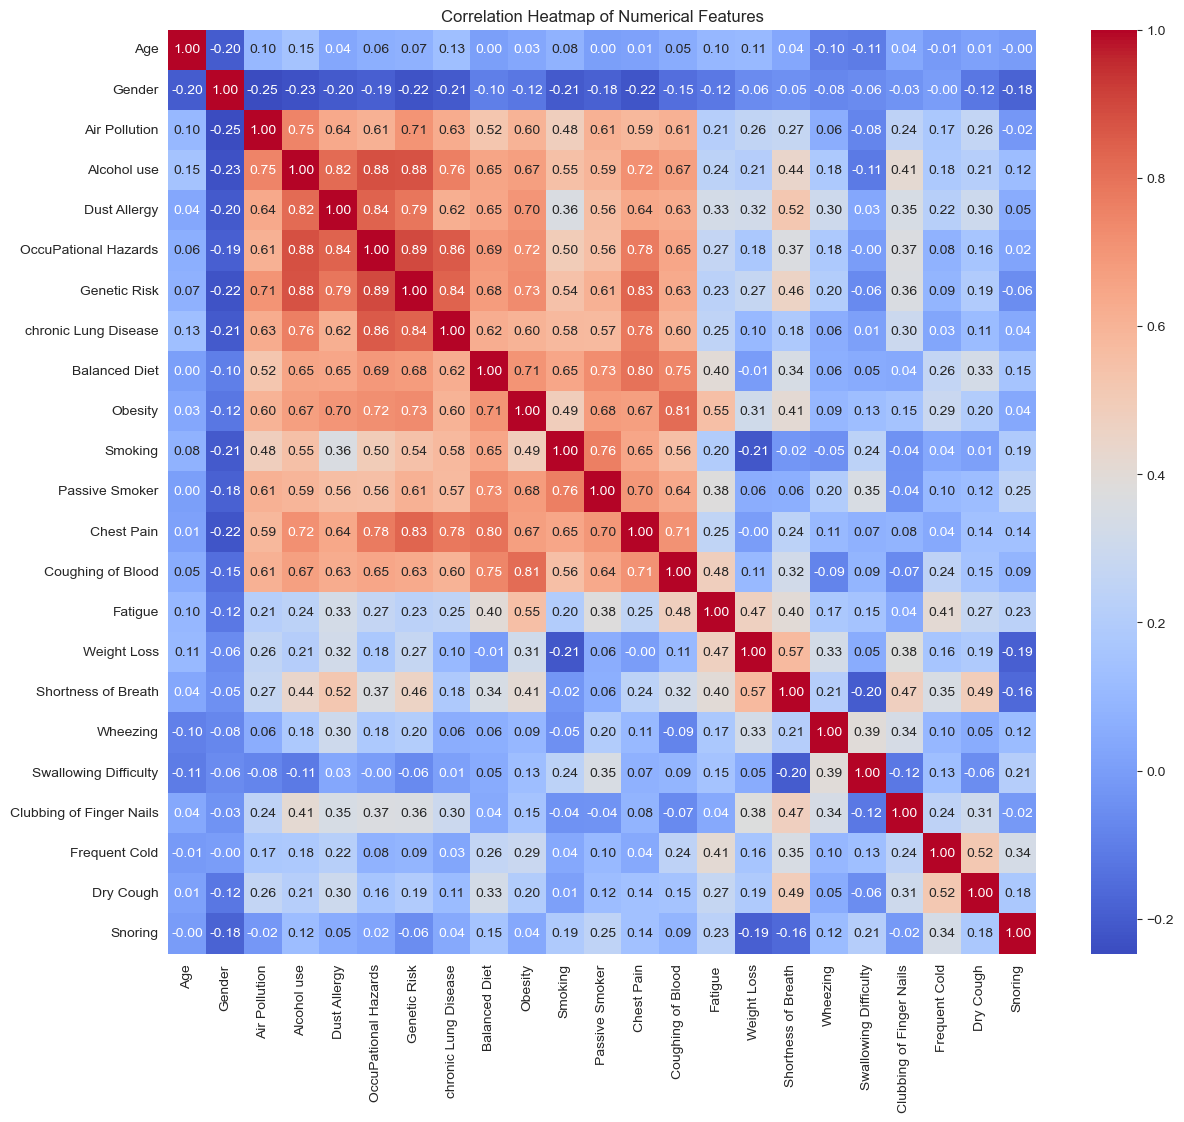

In [8]:
# Correlation Heatmap for numerical features
plt.figure(figsize=(14, 12))
# Select only numeric columns for correlation calculation
numeric_data = data.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [9]:

encoder = LabelEncoder()
data['Level_encoded'] = encoder.fit_transform(data['Level'])

# Prepare features (X) and target (y)
X = data.drop(['Patient Id', 'Level', 'Level_encoded'], axis=1)
y = data['Level_encoded']

In [10]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Output the shapes of the training and test sets to verify the splits
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")

Training set size: 800 samples
Test set size: 200 samples


In [11]:
# Initialise the Random Forest Classifier
random_forest_model = RandomForestClassifier(random_state=42)

# Train the model with the training data
random_forest_model.fit(X_train, y_train)

print("Model training complete.")

Model training complete.


In [12]:
# Make predictions on the test set
y_pred = random_forest_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000


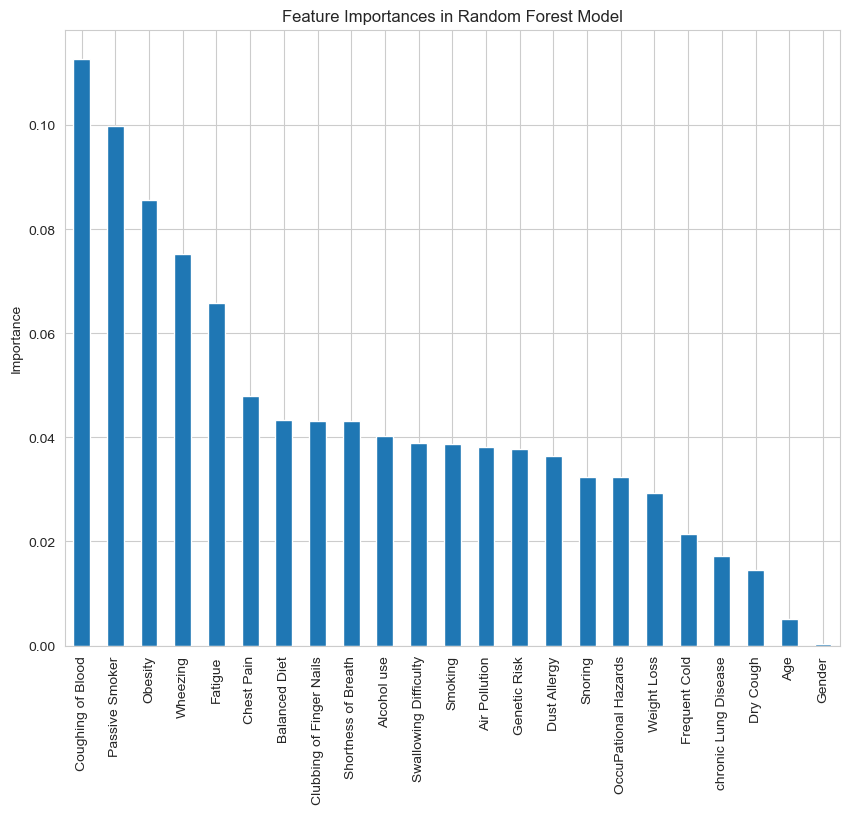

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Get feature importances from the model
feature_importances = random_forest_model.feature_importances_

# Create a pandas series to hold the feature importances and their corresponding feature names for easier plotting
importances = pd.Series(feature_importances, index=X.columns)

# Sort the feature importances in descending order
importances_sorted = importances.sort_values(ascending=False)

# Plot the feature importances
plt.figure(figsize=(10,8))
importances_sorted.plot(kind='bar')
plt.title('Feature Importances in Random Forest Model')
plt.ylabel('Importance')
plt.show()


In [14]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting Classifier
gradient_boosting_model = GradientBoostingClassifier(random_state=42)

# Train the model with the training data
gradient_boosting_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gb = gradient_boosting_model.predict(X_test)

# Evaluate the Gradient Boosting model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb, average='weighted')
recall_gb = recall_score(y_test, y_pred_gb, average='weighted')
f1_gb = f1_score(y_test, y_pred_gb, average='weighted')

# Print the evaluation metrics for the Gradient Boosting model
print(f'Gradient Boosting Classifier - Accuracy: {accuracy_gb:.4f}')
print(f'Precision: {precision_gb:.4f}')
print(f'Recall: {recall_gb:.4f}')
print(f'F1 Score: {f1_gb:.4f}')

Gradient Boosting Classifier - Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
